# Newton's Fractal

This notebook implements Newton's method for finding the root of a function. 
We will visualize the method, leading to a so-called Newton fractal.
The inspiration comes from [3blue1brown](https://www.3blue1brown.com/lessons/newtons-fractal).

# Introduction

Newton's method is iterative. It starts with a seed; a "guess" for the root of a given function. The seed is iteratively refined until it reaches a root. We will use a polynomial of degree 3 as function. Such a polynomial has three roots, so every seed will converge to one of the three roots.

In other words, we have a function $f()$ with three roots. We take a seed $x_0$ and apply Newton's method to refine $x_0$ to $x_1$, then $x_2$, $x_3$, ...  and so on until it is either root 0, root 1 or root 2 of $f()$. This maps $x_0$ to 0, 1, or 2.

The seed $x_0$ is in the complex numbers domain. This means that we can treat $x_0$ as point in 2D. In other words, we can make an image where every pixel corresponds to a seed $x_0$, find the root index (1, 2, or 3), and then color that pixel with one of three colors. At the end of this notebook, we present this image.

# The project directory
To replicate this notebook you need:

- Python (3.8+) on your system
- Start with an empty project directory; 
  then copy `requirements.txt`, `setup.bat`, `run.bat`, and `NewtonsFractal.ipynb` into it.
- Run `setup.bat` to create a virtual Python environment (in subdirectory `env` in the project directory).
  Note that several packages will be installed in the virtual environment (including Jupyter), as listed in `requirements.txt`.
- Run `run.bat` to run the Jupyter server and client (web page in you browser).
- Open this file (NewtonsFractal.ipynb).

## Newton's method

Recall how Newton's method works.

We have a function $f(x)$ and we want to find a root. 
We start with an arbitrary value $x_0$, the "guess" or "seed". Value $x_0$ induces a point $P_0$ on function $f()$. 
A line $l_0$ can be drawn in $P_0$ tangent to $f()$; this line runs through coordinates $(x_0,f(x_0))$ and has slope $f'(x_0)$. In other words the formula for the line is $l_0: y = f'(x_0)\cdot(x-x_0) + f(x_0)$.

The line $l_0$ intersects with the x-axis.

$$0 = f'(x_0)\cdot(x-x_0) + f(x_0)$$

$$-f'(x_0)\cdot(x-x_0) = f(x_0)$$

$$x-x_0 = - \frac{f(x_0)}{f'(x_0)}$$

$$x = x_0 - \frac{f(x_0)}{f'(x_0)}$$

The value found for $x$ is the new approximation $x_1$ for the root. 

We iterate: with $x_1$ determine point $P_1$ on $f()$, tangent line $l_1$,
and the intersection of $l_1$ and the x-axis; this gives $x_2$.
This is the iterative step:

$$ x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})}$$

For details see Newton's method on [wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method).

# Experiment
As mentioned above, we will use complex numbers.

In [1]:
import cmath

We start simple. We take a polynomial of order 2. 
We want to know its two roots a priori, so we begin by defining them.

In [2]:
root0= 1+0j # or complex(1,0)
root1= 0+1j # or complex(0,1)
print( root0, root1 )

(1+0j) 1j


The function (polynomial of order 2) is then defined as follows.

In [3]:
def f(x) : return (x-root0) * (x-root1)

Let's check that the two roots are indeed roots, e.i. that they map to 0.

In [4]:
f(root0)

0j

In [5]:
f(root1)

(-0+0j)

They do - with a bit of a funny notation of the complex numbers.

Next step is to define the derivative of $f$. 

Note that $f(x) = (x-root_0) \cdot (x-root_1) = x^2 - root_0\cdot x - root_1\cdot x +root_0\cdot root_1$. 

As a result, the derivative of $f$ is $2x -root_0 - root_1$:

In [6]:
def f_(x) : return 2*x - root0 - root1

I know that in the real world (as opposed to the complex domain), 
the extreme of a parabola is in the center of its two roots.
The center is

In [7]:
m = (root0+root1)/2
m

(0.5+0.5j)

The derivative at the center is indeed 0:

In [8]:
f_(m)

0j

The iterative step, see introduction, can now be defined.

In [9]:
def f_next(x) : return x - f(x)/f_(x)

The iteration stops when x no longer changes (might be better to have an "epsilon", but it works for now).

In [10]:
def f_iter(start) :
    x = start
    while True :
        prev = x
        x = f_next(x)
        if x == prev : break
        print(x)
    return x

When we start with a seed close to root0, we converge to root0:

In [11]:
f_iter(2+0j)

(1.2999999999999998+0.1j)
(1.025+0.04999999999999997j)
(0.9977941176470588+0.0004901960784313639j)
(1.0000034011684618+1.240677803675391e-06j)
(1.0000000000007947+9.23406332443337e-12j)
(1-3.498069262304327e-23j)
(1+0j)


(1+0j)

When we start "above" root1, we converge to root1:

In [12]:
f_iter(0+2j)

(0.1+1.2999999999999998j)
(0.04999999999999997+1.025j)
(0.0004901960784313639+0.9977941176470588j)
(1.240677803675391e-06+1.0000034011684618j)
(9.23406332443337e-12+1.0000000000007947j)
(-3.498069262304327e-23+1j)
1j


1j

When we start at 0, we get an error - the derivative in the denominator is zero.

In [13]:
try : 
    f_iter(0)
except Exception as e:
    print(e)

(0.5+0.5j)
complex division by zero


# Cubic function

With the encouraging results of the previous section, we switch to a polynomial of degree 3.


In [14]:
from math import sin, cos, pi

I want symmetrical roots - in the complex domain.

In [15]:
alpha = 2*pi / 3
r0 = complex( cos(0*alpha), sin(0*alpha) )
r1 = complex( cos(1*alpha), sin(1*alpha) )
r2 = complex( cos(2*alpha), sin(2*alpha) )
print( r0, r1, r2)

(1+0j) (-0.4999999999999998+0.8660254037844387j) (-0.5000000000000004-0.8660254037844385j)


These roots setup the cubic function $g()$.

In [16]:
def g(x) : return (x-r0) * (x-r1) * (x-r2)

Note that 

$$ g(x) = (x−r_0)\cdot(x−r_1)\cdot(x−r_2) $$

$$ g(x) = (x^2−r_0x-r_1x+r_0r_1)\cdot(x−r_2) $$

$$ g(x) = (x^3−r_0x^2-r_1x^2+r_0r_1x) - (r_2x^2−r_0r_2x-r_1r_2x+r_0r_1r_2) $$

$$ g(x) = x^3−r_0x^2-r_1x^2-r_2x^2+r_0r_1x+r_0r_2x+r_1r_2x-r_0r_1r_2 $$

$$ g(x) = x^3−(r_0+r_1+r_2)x^2+(r_0r_1+r_0r_2+r_1r_2)x-r_0r_1r_2 $$

As a result, the derivative of $g()$ is

$$ g'(x) = 3x^2−2(r_0+r_1+r_2)x+(r_0r_1+r_0r_2+r_1r_2) $$

In [17]:
def g_(x) : return 3*x*x - 2*(r0+r1+r2)*x + (r0*r1+r0*r2+r1*r2)

The "next" function is the same as before (replacing f with g):

In [18]:
def g_next(x) : return x - g(x)/g_(x)

The "iteration" is also the same:

In [19]:
def g_iter(start) :
    x = start
    while True :
        prev = x
        x = g_next(x)
        if x == prev : break
        print(x)
    return x

If we start close to r1, we end up at r1.

In [20]:
g_iter(0+1j)

(-0.33333333333333326+0.666666666666667j)
(-0.5822222222222218+0.9244444444444442j)
(-0.5087908032893188+0.8681655118873491j)
(-0.5000687390673925+0.8659822186925402j)
(-0.4999999962890295+0.8660253983385868j)
(-0.4999999999999998+0.8660254037844387j)


(-0.4999999999999998+0.8660254037844387j)

If we start close to r2, we end up at r2.

In [21]:
g_iter(0-1j)

(-0.33333333333333337-0.6666666666666663j)
(-0.5822222222222232-0.9244444444444444j)
(-0.5087908032893197-0.8681655118873489j)
(-0.5000687390673931-0.86598221869254j)
(-0.4999999962890302-0.8660253983385866j)
(-0.5000000000000004-0.8660254037844385j)


(-0.5000000000000004-0.8660254037844385j)

Finally, when we start close to r0, we end up at r0.

In [22]:
g_iter(2+0j)

(1.4166666666666665+9.251858538542963e-18j)
(1.1105344098423684+3.244097143892603e-17j)
(1.0106367684045563+5.469077781260913e-18j)
(1.0001115573039492+8.175255136482192e-19j)
(1.0000000124431812-1.1817385323891998e-21j)
(1.0000000000000002-8.998756435412522e-25j)
(1-3.0233097568615053e-33j)
(1+3.4211388289180104e-49j)
(1-7.596454196607839e-65j)
(1+1.6867516709168837e-80j)
(1-3.745341083753759e-96j)
(1+8.31632781251592e-112j)
(1-1.8465957235571472e-127j)
(1+4.100266178934991e-143j)
(1-9.104419837890877e-159j)
(1+2.0215873059760975e-174j)
(1-4.4888255467692094e-190j)
(1+9.967194951097568e-206j)
(1-2.2131618651272261e-221j)
(1+4.914206519773204e-237j)
(1-1.091173045203054e-252j)
(1+2.4228908772695546e-268j)
(1-5.379898476197808e-284j)
(1+1.1945774316841202e-299j)
(1-2.65249474e-315j)
(1+0j)


(1+0j)

# Newton's fractal - low resolution 

We will now make a fractal "ASCII style". The idea is that for every point `(x,y)` in the 2D plane, we treat it as the seed of `g_iter`, that is, we call `g_iter( complex(x,y) )`. The iteration converges to one of the three roots. This maps `(x,y)` to the index of the root it converges to.

First, we make a variant of `g_iter`, which no longer returns the point is converges to, but rather the _index_ of that root.

In [23]:
def g_root(start) :
    x = start
    while True :
        prev = x
        x = g_next(x)
        if x == prev : break
    if x==r0 : return 0
    if x==r1 : return 1
    if x==r2 : return 2
    return -1

I am a bit surprised, but until now, it turns out that at the end of the while loop, `x` really is either and `r0`, `r1`, or `r2` . I expected several problems:

- `g_next()` to raise an exception (division by zero).
- `while` loop not terminating due to not converging (eg oscillation).
- numerical differences between `x` and `r0`, `r1`, and `r2` due to numerical inaccuracies, leading to a return of -1.

Next step is to define the grid size, and the associated 2D coordinates.

In [24]:
ixsize  = 21   # drawing grid width (integer domain)
iysize  = 21   # drawing grid height (integer domain)
fxstart = -2.0 # lower left corner x-coordinate (float domain)
fystart = -2.0 # lower left corner y-coordinate (float domain)
fxsize  =  4.0 # width (float domain)
fysize  =  4.0 # height (float domain)

With those settings known, we can generate a grid and plot for every 2D point the root to which it converges.

In [25]:
for iy in range(iysize) :
    fy = (iysize-iy) * fysize/iysize + fystart + 0.5*fysize/iysize
    row = ""
    for ix in range(ixsize) :
        fx = ix * fxsize/ixsize + fxstart + 0.5*fxsize/ixsize
        z0 = complex(fx,fy)
        root = g_root(z0)
        row += f" {root}"
    print(row)

 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 0 0 0 0
 2 2 1 2 2 1 1 0 2 1 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 2 1 1 2 2 0 1 2 0 1 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 0 0 0


# Newton's fractal - high resolution 

We will now switch from an "ASCII" grid to a real image.

In [26]:
from PIL import Image, ImageColor

`fractal` is a function that wraps the above for-loops, returning the resulting image. The settings are passed explicitly.

In [27]:
def fractal(settings) :
    # Extract settings
    ixsize    = settings["ixsize"]
    iysize    = settings["iysize"]
    fxscale   = settings["fxsize"] / ixsize
    fyscale   = settings["fysize"] / iysize
    fxstarth  = settings["fxstart"] + 0.5*fxscale
    fystarth  = settings["fystart"] + 0.5*fyscale
    colors    = [ settings["root0color"], settings["root1color"], settings["root2color"] ]
    # Setup imgae
    img = Image.new("RGB", (ixsize,iysize) )
    # Fill pixels
    for iy in range(iysize) :
        fy = (iysize-iy) * fyscale + fystarth
        for ix in range(ixsize) :
            fx = ix * fxscale + fxstarth
            z0 = complex(fx,fy)
            root = g_root(z0)
            img.putpixel( (ix,iy) , colors[root] )
    return img

After filling the `settings`

In [28]:
settings = {}
settings["ixsize"]     = 801
settings["iysize"]     = 801
settings["fxsize"]     =   3.0
settings["fysize"]     =   3.0
settings["fxstart"]    =  -1.5
settings["fystart"]    =  -1.5
settings["root0color"] = ImageColor.getrgb("#c04050")
settings["root1color"] = ImageColor.getrgb("#c0b040")
settings["root2color"] = ImageColor.getrgb("#4050c0")

# settings["root0color"] = ImageColor.getrgb("black")
# settings["root1color"] = ImageColor.getrgb("gray")
# settings["root2color"] = ImageColor.getrgb("gainsboro")

we can draw the fractal

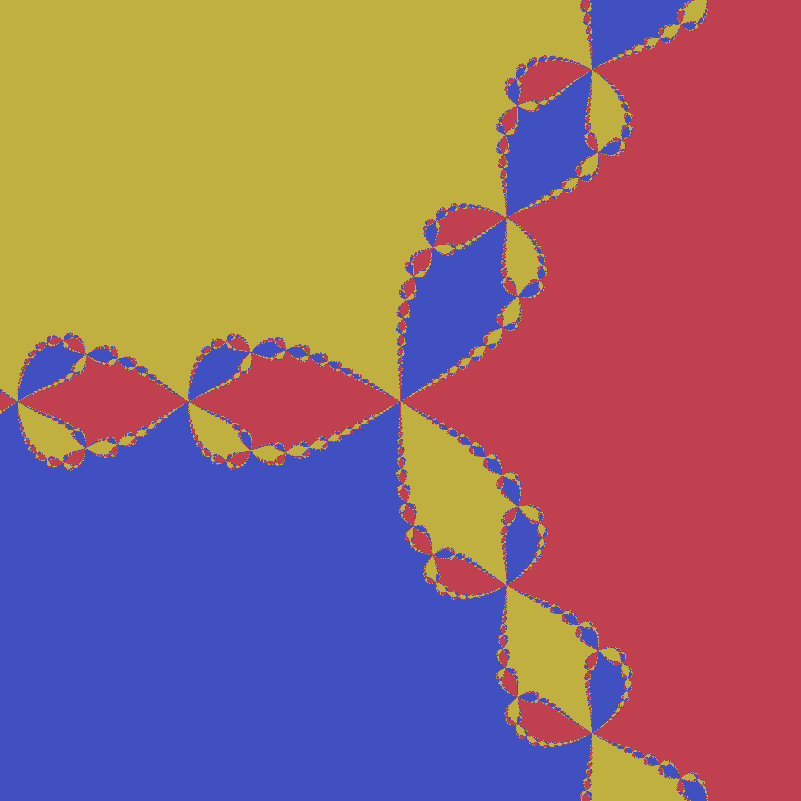

In [29]:
fractal(settings)

A bit wasteful of the computation time, but we generate the fractal again to save it to a file.

In [30]:
%%time
image = fractal(settings)
image.save("NewtonsFractal.png")

Wall time: 5.77 s


(end)